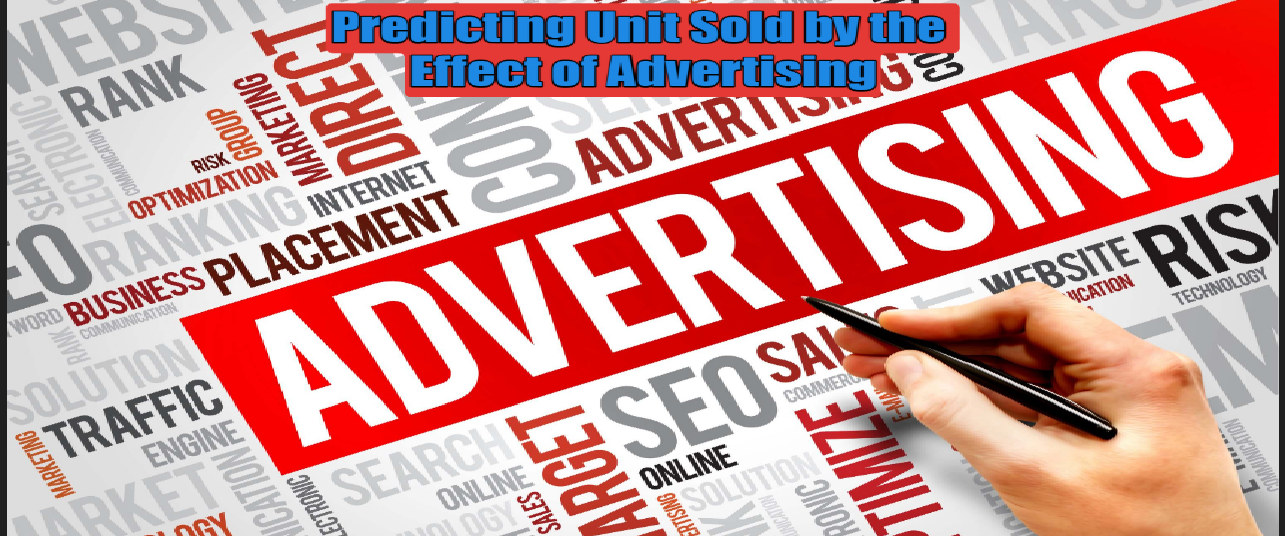

### Import required library

In [32]:
import pandas as pd
import numpy as np

#graphs & charts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

#removing warning
import warnings
warnings.filterwarnings('ignore')

#train test split
from sklearn.model_selection import train_test_split

#for evaluation of model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,accuracy_score

#Linear Regression
from sklearn.linear_model import LinearRegression

#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

#Random forest regressor
from sklearn.ensemble import RandomForestRegressor

#Support vector machine regressor
from sklearn.svm import SVR

#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

#Staking regressor
from sklearn.ensemble import StackingRegressor
from mlxtend.regressor import StackingRegressor

#Adaboosting regressor
from sklearn.ensemble import AdaBoostRegressor

#XBBoost regressor
from xgboost import XGBRegressor

### Load & Read the dataset

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\\advertizing.csv')
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

##### The dataset is about the advertising cost incurred by the business on various advertising platforms

In [3]:
df.shape, df.size

((200, 4), 800)

In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Statistical measures

In [7]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

### Missing Values

In [8]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**No missing value.**

### Outliers

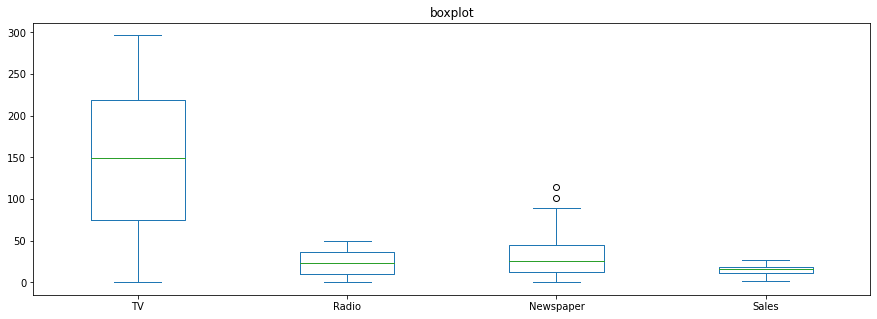

In [9]:
plt.rcParams["figure.figsize"] = [15, 5]
ax = df[['TV', 'Radio', 'Newspaper', 'Sales']].plot(kind='box', title='boxplot')
plt.show()

**No Outliers in any of the column.**

### Correlation matrix

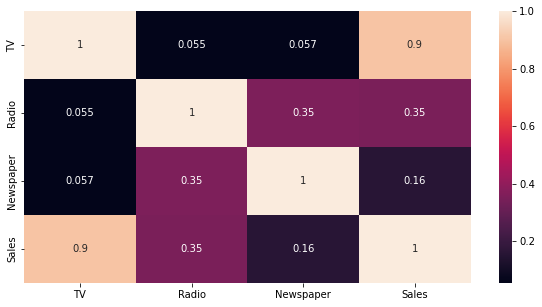

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True);

**From heatmap we clearly see that the TV advertisment has much higher effect on sales than any other platform.**

### Relation between Sales & Spending on TV advertisment

In [11]:
figure = px.scatter(data_frame = df, x="TV",
                    y="Sales", size="TV", trendline="ols",
                   title="Relation between Sales & Spending on TV advertisment")
figure.show()

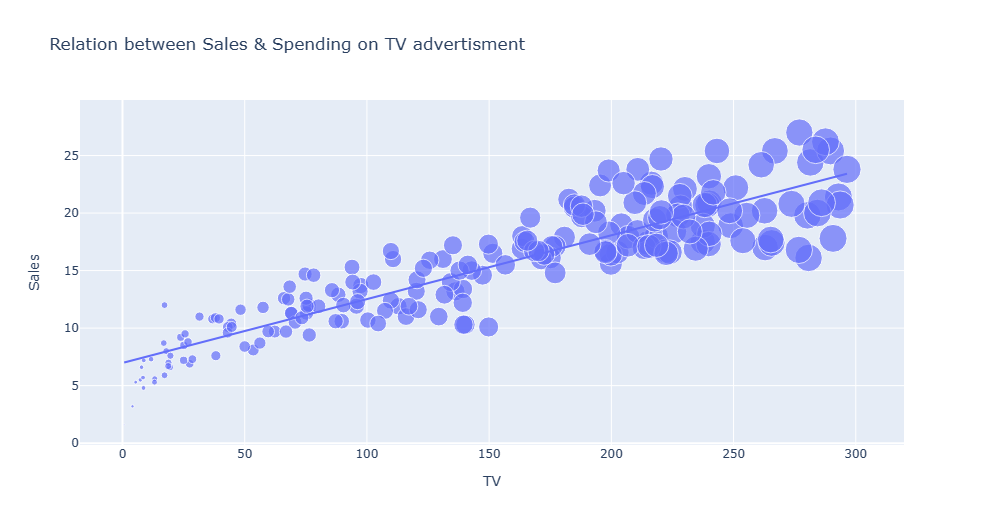

**Effect of TV advertisment on Sales in positive, Higher the Dollar spent on TV advertisement higher will be the sales of the product.**

### Relation between Sales & Spending on Newspaper advertisment

In [12]:
figure = px.scatter(data_frame = df, x="Newspaper",
                    y="Sales", size="Newspaper", trendline="ols",
                   title="Relation between Sales & Spending on Newspaper advertisment")
figure.show()

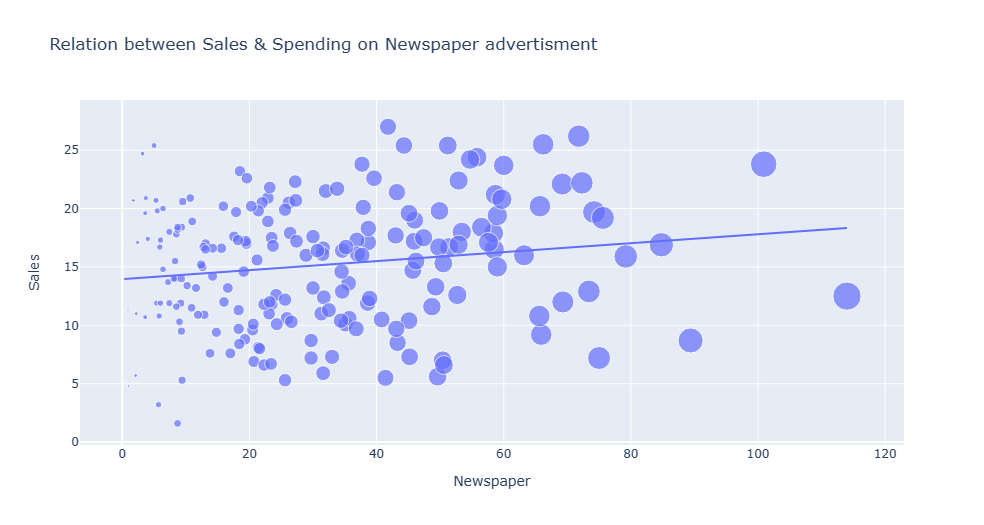

**Relation is positive but effect is not much as TV adverisement.**

### Relation between Sales & Spending on Radio advertisment

In [13]:
figure = px.scatter(data_frame = df, x="Radio",
                    y="Sales", size="Radio", trendline="ols",
                   title="Relation between Sales & Spending on Radio advertisment")
figure.show()

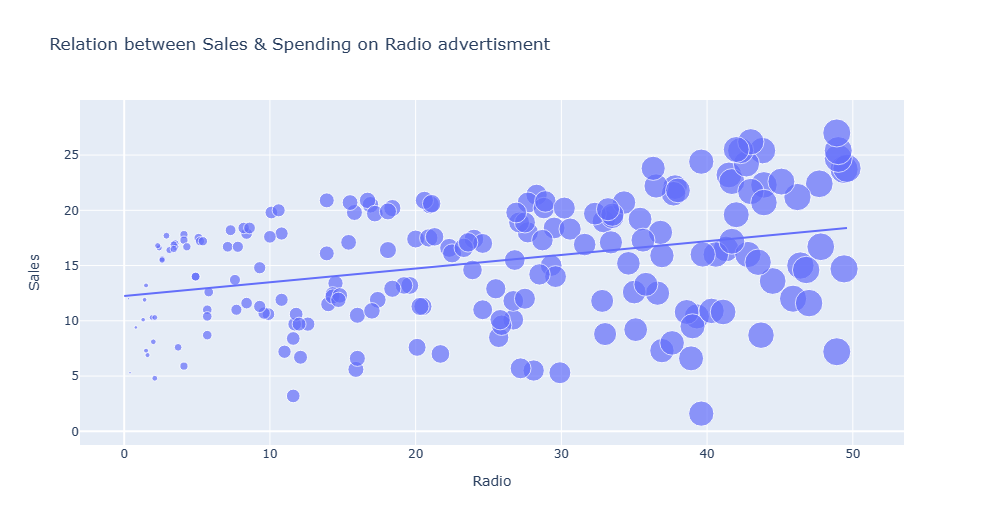

**Relationship is positive and similar to that of Newspaper but less as compare to TV advertisement.**

## Machine Learning models

### Create Dependent(y), independent(X) feature

In [14]:
X=df.drop('Sales', axis=1).values
y=df['Sales'].values.reshape(-1, 1)

### Train test split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print("X train Shape",x_train.shape)
print("X test Shape",x_test.shape)
print("y train Shape",y_train.shape)
print("y test Shape",y_test.shape)

X train Shape (160, 3)
X test Shape (40, 3)
y train Shape (160, 1)
y test Shape (40, 1)


### Creating Different Linear Regression models to predict the Sales

### 1. Linear Regression

In [16]:
ln=LinearRegression()
ln.fit(x_train,y_train)
y_pred=ln.predict(x_test)

In [17]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

results=pd.DataFrame({'Model':['Linear Regression'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71

**RMSE is low..**

### 2. Decision Tree Regressor

In [18]:
dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [19]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

dec_tree=pd.DataFrame({'Model':['Decision Tree'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,dec_tree])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31

**RMSE lower than Linear Regression.**

### 3. Random Forest Regressor

In [20]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [21]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

random=pd.DataFrame({'Model':['Random Forest'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,random])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31
0      Random Forest  1.80  1.34  13.62

**RMSE is lower than Decisio Tree & Linear Regression**

### 4. Support Vector Machine Regressor

In [22]:
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [23]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

svmr=pd.DataFrame({'Model':['SVMR'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,svmr])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31
0      Random Forest  1.80  1.34  13.62
0               SVMR  5.55  2.36  23.19

**RMSE is high hence this model is not preffered for prediction.**

### 5. Gradient Boosting

In [24]:
grb= GradientBoostingRegressor(n_estimators =100,random_state =0) 
grb.fit(x_train, y_train) 
y_pred = grb.predict(x_test)

In [25]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

gradient=pd.DataFrame({'Model':['Gradient Boosting'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,gradient])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31
0      Random Forest  1.80  1.34  13.62
0               SVMR  5.55  2.36  23.19
0  Gradient Boosting  1.98  1.41  13.14

**RMSE is lower than LR, Decision tree and Ramdom forest**

### 6. Stacking Regressor

In [26]:
stack = StackingRegressor(regressors=[svr,ln,dt,rf,grb],
                          meta_regressor=rf)
stack.fit(x_train,y_train)
y_pred=stack.predict(x_test)

In [27]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

stacking=pd.DataFrame({'Model':['Stacking'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,stacking])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31
0      Random Forest  1.80  1.34  13.62
0               SVMR  5.55  2.36  23.19
0  Gradient Boosting  1.98  1.41  13.14
0           Stacking  3.07  1.75  17.33

**RMSE is not less than Random Forest.**

### 7. ADABoost Regressor

In [28]:
ada=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [29]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

adaboost=pd.DataFrame({'Model':['ADABoost'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,adaboost])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31
0      Random Forest  1.80  1.34  13.62
0               SVMR  5.55  2.36  23.19
0  Gradient Boosting  1.98  1.41  13.14
0           Stacking  3.07  1.75  17.33
0           ADABoost  2.70  1.64  16.61

**RMSE is not less than Random Forest.**

### 8. XGBoost Regressor

In [30]:
xgb=XGBRegressor(verbosity=0) 
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [31]:
mse=mean_squared_error(y_test,y_pred).round(2)
rmse=np.sqrt(mse).round(2)
mape=mean_absolute_percentage_error(y_test,y_pred).round(4)*100

xgbboost=pd.DataFrame({'Model':['XGBoost'],'MSE':[mse],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,xgbboost])
results

Model   MSE  RMSE   MAPE
0  Linear Regression  4.52  2.13  20.71
0      Decision Tree  4.10  2.02  21.31
0      Random Forest  1.80  1.34  13.62
0               SVMR  5.55  2.36  23.19
0  Gradient Boosting  1.98  1.41  13.14
0           Stacking  3.07  1.75  17.33
0           ADABoost  2.70  1.64  16.61
0            XGBoost  1.78  1.33  10.98

**RMSE is less than Random Forest**

### Conclusion:
1. **XGBoost**
2. **Random Forest**
2. **Gradient Boost**

are the Best suited models to predict the Advertisment effect in Sales.